# Exercise 3

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #main plotting tool for python
import json
from datetime import date
import seaborn as sns
import ast
from scipy import stats #The statistics part of the library

<span style="color:black; font-weight:700;font-size:18px"> Για αρχή θα κάνουμε προεπεξεργασία τα δεδομένα. Διαβάζουμε το αρχείο με τις επιχειρήσεις, το μετατρέπουμε προσωρινά και το ξαναδιαβάζουμε γιατι υπήρχε θέμα με τις null τιμές, οι οποίες φεύγουν με το dropna(). </span>

In [10]:
with open('yelp_dataset/yelp_academic_dataset_business.json', encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile, lines=True)

# save to csv file
df.to_csv('businessCSVTEMP.csv')

df = pd.read_csv('businessCSVTEMP.csv')

In [11]:
df.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471658,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [12]:
# get reviews of city Philadephia
df = df[df.city=='Philadelphia']
# drop null values
df.dropna()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150319,150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Coffee & Tea, Food, Sandwiches, American (Trad...","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."
150320,150320,wPAaAbFbq5wfLfW0gnYU7g,Intermix,1718 Walnut St,Philadelphia,PA,19103,39.950060,-75.170129,2.0,10,0,"{'BusinessParking': ""{'garage': False, 'street...","Fashion, Shopping, Women's Clothing","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
150329,150329,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,"1100 S Columbus Blvd, Ste 24",Philadelphia,PA,19147,39.932756,-75.144504,3.0,32,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Day Spas, Beauty & Spas, Skin Care, Massage","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
150334,150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


<span style="color:black; font-weight:700;font-size:18px"> Αποθηκεύουμε σε μορφές json csv. </span>

In [13]:
# save to json file
df.to_json('businessPhilly.json')

In [14]:
# save to csv file
df.to_csv('businessPhilly.csv')

<span style="color:black; font-weight:700;font-size:20px"> Read reviews </span>

In [16]:
df = pd.read_csv('businessPhilly.csv')

df.head()
df.dropna()

,Unnamed: 0,Unnamed: 0.1,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,15,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,19,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,28,28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,31,31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,150319,150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104.0,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Coffee & Tea, Food, Sandwiches, American (Trad...","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."
14564,150320,150320,wPAaAbFbq5wfLfW0gnYU7g,Intermix,1718 Walnut St,Philadelphia,PA,19103.0,39.950060,-75.170129,2.0,10,0,"{'BusinessParking': ""{'garage': False, 'street...","Fashion, Shopping, Women's Clothing","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
14566,150329,150329,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,"1100 S Columbus Blvd, Ste 24",Philadelphia,PA,19147.0,39.932756,-75.144504,3.0,32,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Day Spas, Beauty & Spas, Skin Care, Massage","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
14567,150334,150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103.0,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


<span style="color:black; font-weight:700;font-size:18px"> Ο υπολογιστής μου αδυνατούσε να διαβάσει ολόκληρο το αρχείο και να επιλέξει τα reviews με business_id που υπάρχουν στο απο πάνω αρχείο. Δοκίμασα αρχικά να διαβάζω με την read_json και να κάνω batches και skip, αλλά ούτε αυτό δούλευε, με όσο μικρό batch και αν διάλεγα. Οπότε επέλεξα το απλό σκεπτικό, ότι διαβάζω γραμμή-γραμμή, κάνω τον επιθυμητό έλεγχο και μόλις διαβαστούν 100 γραμμές αδειάζω την λίστα. Καταφεύγοντας στην πιο απλή μέθοδο, απέφυγα το πρόβλημα μνήμης. </span>

In [18]:
# the plan: read line by line, append, delete the read line

In [38]:
data = []
reviews = []
phillyBusiness = np.array(df.business_id.values)
i = 0
realCounter = 0
with open('yelp_dataset/yelp_academic_dataset_review.json', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
        #print(data[i]["business_id"])
        if(data[i]["business_id"] in phillyBusiness):
            reviews.append(data[i])
            #print("Found one! at:",realCounter)
        
        #break after 1000 lines
        #if(realCounter==10000):
        #    break
        if(i==1000):
            #print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            # clear the list so we dont have memory problem
            data = []
            i = -1
        i+=1
        realCounter += 1

In [39]:
revDf = pd.DataFrame(reviews)

In [40]:
revDf.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
3,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14
4,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25


In [42]:
ls = revDf.dropna()
print(len(ls.index))

967552


<span style="color:black; font-weight:700;font-size:18px"> Αποθηκεύουμε σε αρχείο csv. </span>

In [43]:
# save to csv file
revDf.to_csv('reviewsPhilly.csv', encoding='utf-8', index=False)

# Exercise 3A

<span style="color:black; font-weight:700;font-size:18px">Διαβάζουμε τις επιχειρήσεις από την Philadelphia.</span>

In [148]:
df = pd.read_csv('businessPhilly.csv')

df.head()

,Unnamed: 0,Unnamed: 0.1,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,15,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,19,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,28,28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,31,31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


<span style="color:black; font-weight:700;font-size:18px">Λογαριθμίζουμε τον πίνακα.</span>

In [149]:
logReview = np.log1p(df.review_count.pct_change())

<span style="color:black; font-weight:700;font-size:18px">Μετατρέπουμε την στήλη σε λίστα και την χωρίζουμε σε 100 ισομεγέθη διαστήματα.</span>

In [150]:
# turn column review_count into list
reviewList = df['review_count'].tolist()

# split review_count list into 10 bins
reviewTemp = np.sort(reviewList)
reviewListBins=np.array_split(reviewTemp, 100)

print("How many bins out of review_count column:",len(reviewListBins))
binDict = {}
binCounter = 0
for i in range(len(reviewListBins)):
    if(reviewListBins[i][0] not in binDict):
        binCounter = len(reviewListBins[i])
        binDict[reviewListBins[i][0]] = binCounter
    else:
        binCounter += binDict[reviewListBins[i][0]]
        binDict[reviewListBins[i][0]] = binCounter
#print(binDict)

lowBorders = list(binDict.keys())
countsPerBorder = list(binDict.values())
#print(lowBorders)
#print(countsPerBorder)
logOfCounts = np.log2(countsPerBorder)
#print(logOfCounts)

How many bins out of review_count column: 100


<span style="color:black; font-weight:700;font-size:18px">Κάνουμε sort ώστε να βρούμε το rank και μετά λογαριθμίζουμε.</span>

In [151]:
rankReview = reviewList
rankReview.sort(reverse=True)
rankReview = np.log2(rankReview)
#print(rankReview)

axx = np.log2(np.arange(1,len(rankReview)+1))

<span style="color:black; font-weight:700;font-size:18px">Για το πρώτο plot: Κάνουμε plot 100 bins, στον άξονα x έχουμε το πλήθος των reviews και στον άξονα y το πλήθος των μαγαζιών. Οπότε ανά bin ουσιαστικά έχουμε το πλήθος των μαγαζιών που έχουν τόσο πλήθος reviews. Η πρώτη στήλη έφτανε μέχρι το 7000, αλλά για πρακτικούς λόγους ο άξονας y φτάνει μέχρι το 2000.</span>

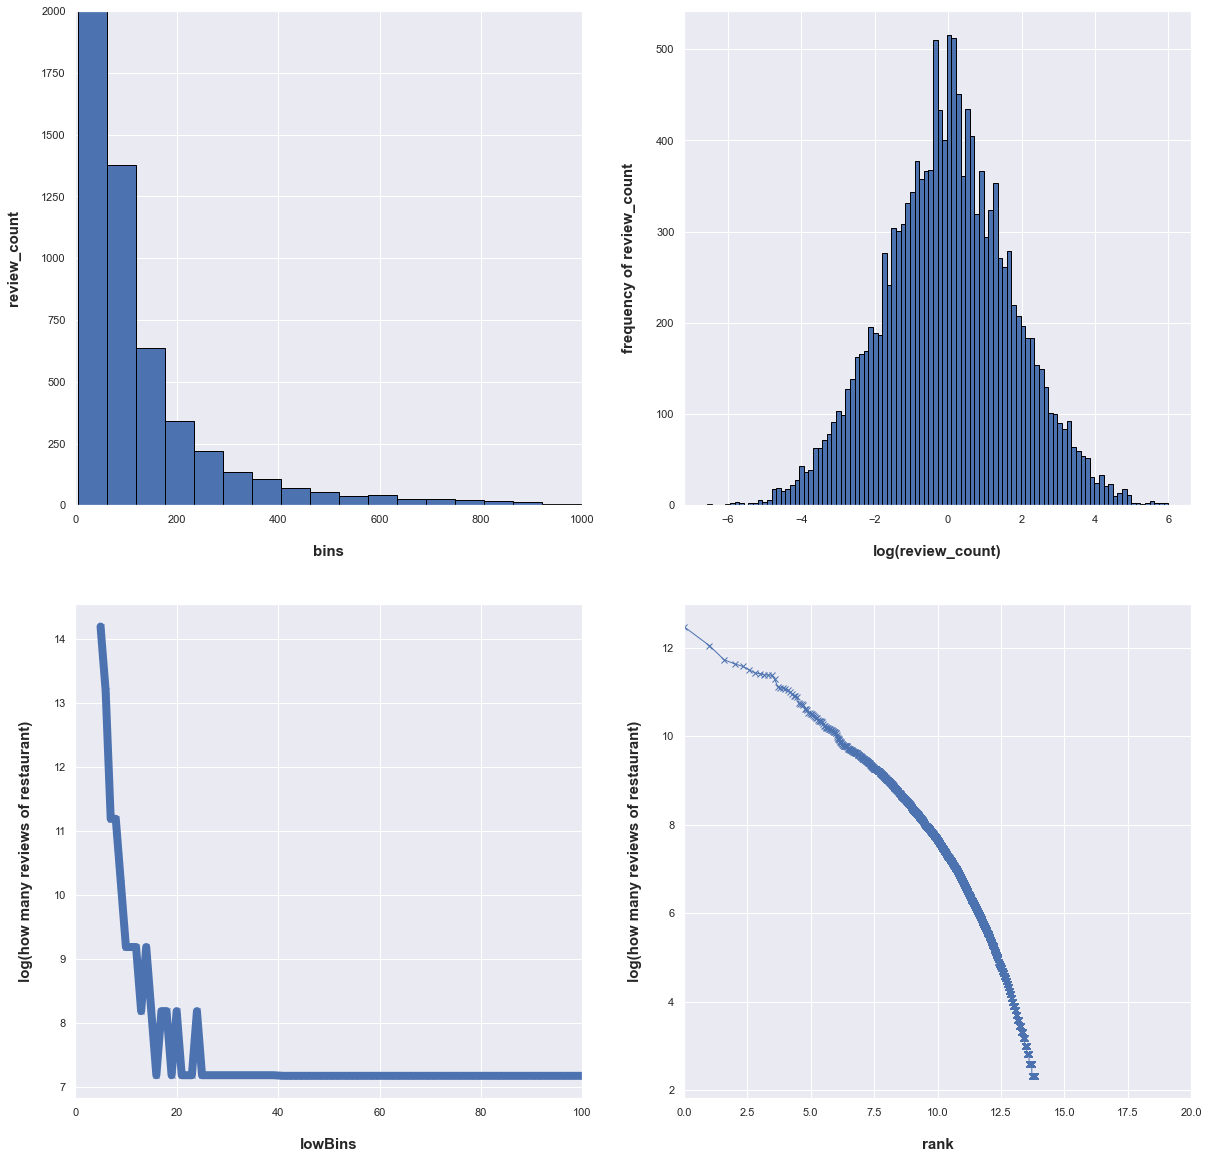

In [152]:
plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 15})
plt.subplot(2, 2, 1)
plt.hist(df.review_count, bins=100, edgecolor="black")
plt.xlabel("bins", labelpad=20, weight='bold', size=15)
plt.ylabel("review_count", labelpad=20, weight='bold', size=15)
plt.xlim(0,1000)
plt.ylim(0,2000)


plt.rcParams.update({'font.size': 15})
plt.subplot(2, 2, 2)
plt.hist(logReview, bins=100, edgecolor="black")
plt.xlabel("log(review_count)", labelpad=20, weight='bold', size=15)
plt.ylabel("frequency of review_count", labelpad=20, weight='bold', size=15)


plt.rcParams.update({'font.size': 15})
plt.subplot(2, 2, 3)
plt.plot(lowBorders,logOfCounts, linewidth=8, marker='x')
plt.xlim(0,100)
plt.ylabel("log(how many reviews of restaurant)", labelpad=20, weight='bold', size=15)
plt.xlabel("lowBins", labelpad=20, weight='bold', size=15)


plt.rcParams.update({'font.size': 15})
plt.subplot(2, 2, 4)
plt.plot(axx,rankReview, linewidth=1, marker='x')
plt.xlim(0,20)
plt.ylabel("log(how many reviews of restaurant)", labelpad=20, weight='bold', size=15)
plt.xlabel("rank", labelpad=20, weight='bold', size=15)


plt.show()

# Exercise 3B

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε για αρχή τα reviews από την Philadelphia, κάνουμε μετατροπή το string σε ημερομηνία και κρατάμε μόνο μέρες, μήνες και χρόνο, δηλαδή έχουμε format yy/mm/dd. Ύστερα κάνουμε group σύμφωνα με date και μέσα σε κάθε dataframe κάνουμε εσωτερικά sort με βάση την ημερομηνία. </span>

In [50]:
df = pd.read_csv('reviewsPhilly.csv')

# convert to date
df['date'] = pd.to_datetime(df['date'])

# trying to remove the hours/seconds, leave the date only
df['date'] = pd.to_datetime(df['date']).dt.date

# group by business_id and sort by date within each dataframe
df2 = df.sort_values(['date'],ascending=True).groupby('business_id')

<span style="color:black; font-weight:700;font-size:18px"> Εδώ πέρα πηγαίνουμε μέσα σε κάθε dataframe από το groupby και βρίσκουμε τρείς στήλες. Η πρώτη νέα στήλη δείχνει σε ποιόν μήνα έχει γραφτεί το review, το οποίο βρίσκουμε με την διαφορά σε μέρες από το πρώτο review και διαίρεση με 30. Στην δεύτερη στήλη τα αστέρια από τα εκάστοτε review και τέλος η τελευταία στήλη μια μονάδα, η οποία είναι βοηθητική για να μετρήσουμε το πλήθος των review ανά μήνα. Έχοντας αυτές τις τρεις στήλες ανά dataframe δημιουργούμε το τελικό dataframe, με τις ίδιες τρεις στήλες, όπου γίνεται πρόσθεση σε κάθε στήλη.</span>

In [51]:
starsData = pd.DataFrame([])

for bus, reviews in df2:
    #print(reviews.head)
    #print(type(reviews))
    firstDate = reviews['date'].iloc[0]
    #print("first date:",firstDate)
    ll = []
    tup = ()
    for d in reviews['date']:
        diff = d - firstDate
        #print("diff in days:",diff.days)
        ll.append(int(diff.days / 30))
    
    #datall = pd.Series(ll)
    #print(reviews)
    #reviews = pd.merge(reviews, datall, on=["date"])
    reviews = reviews.assign(month=ll)
    reviews = reviews.assign(n=[1]*len(ll))
    #print("after adding:")
    #print(reviews[['month','stars','n']])
    curRev = reviews[['month','stars','n']]
    starsData = pd.concat([starsData, curRev]).groupby(['month']).sum().reset_index()
    #print('=============================')
    #print('=============================')

<span style="color:black; font-weight:700;font-size:18px"> Θα προσθέσουμε μια τέταρτη στήλη, mean=stars/n (ανά μήνα).</span>

In [52]:
starsData['mean'] = starsData['stars']/starsData['n']
starsData.head()

,month,stars,n,mean
0,0,149858.0,37636,3.981773
1,1,67454.0,16880,3.996090
2,2,56655.0,14239,3.978861
3,3,50262.0,12680,3.963880
4,4,45960.0,11671,3.937966


<span style="color:black; font-weight:700;font-size:18px"> Εκτυπώνουμε τον νέο μας πίνακα.</span>

In [53]:
print(starsData)

     month     stars      n      mean
0        0  149858.0  37636  3.981773
1        1   67454.0  16880  3.996090
2        2   56655.0  14239  3.978861
3        3   50262.0  12680  3.963880
4        4   45960.0  11671  3.937966
..     ...       ...    ...       ...
201    201     219.0     60  3.650000
202    202     184.0     48  3.833333
203    203      26.0     11  2.363636
204    204      33.0     12  2.750000
205    205      22.0      6  3.666667

[206 rows x 4 columns]


<span style="color:black; font-weight:700;font-size:18px"> Βρίσκουμε το confidence interval από τον τύπο και εκτυπώνουμε το γράφημα μέσο όρο αστεριών ανά μήνα.</span>

In [54]:
# ci = 1.95*σ/sqr_root(n), we chose 1.96 cause of 95%
ci = 1.96 * np.std(starsData['mean'])/np.sqrt(206)

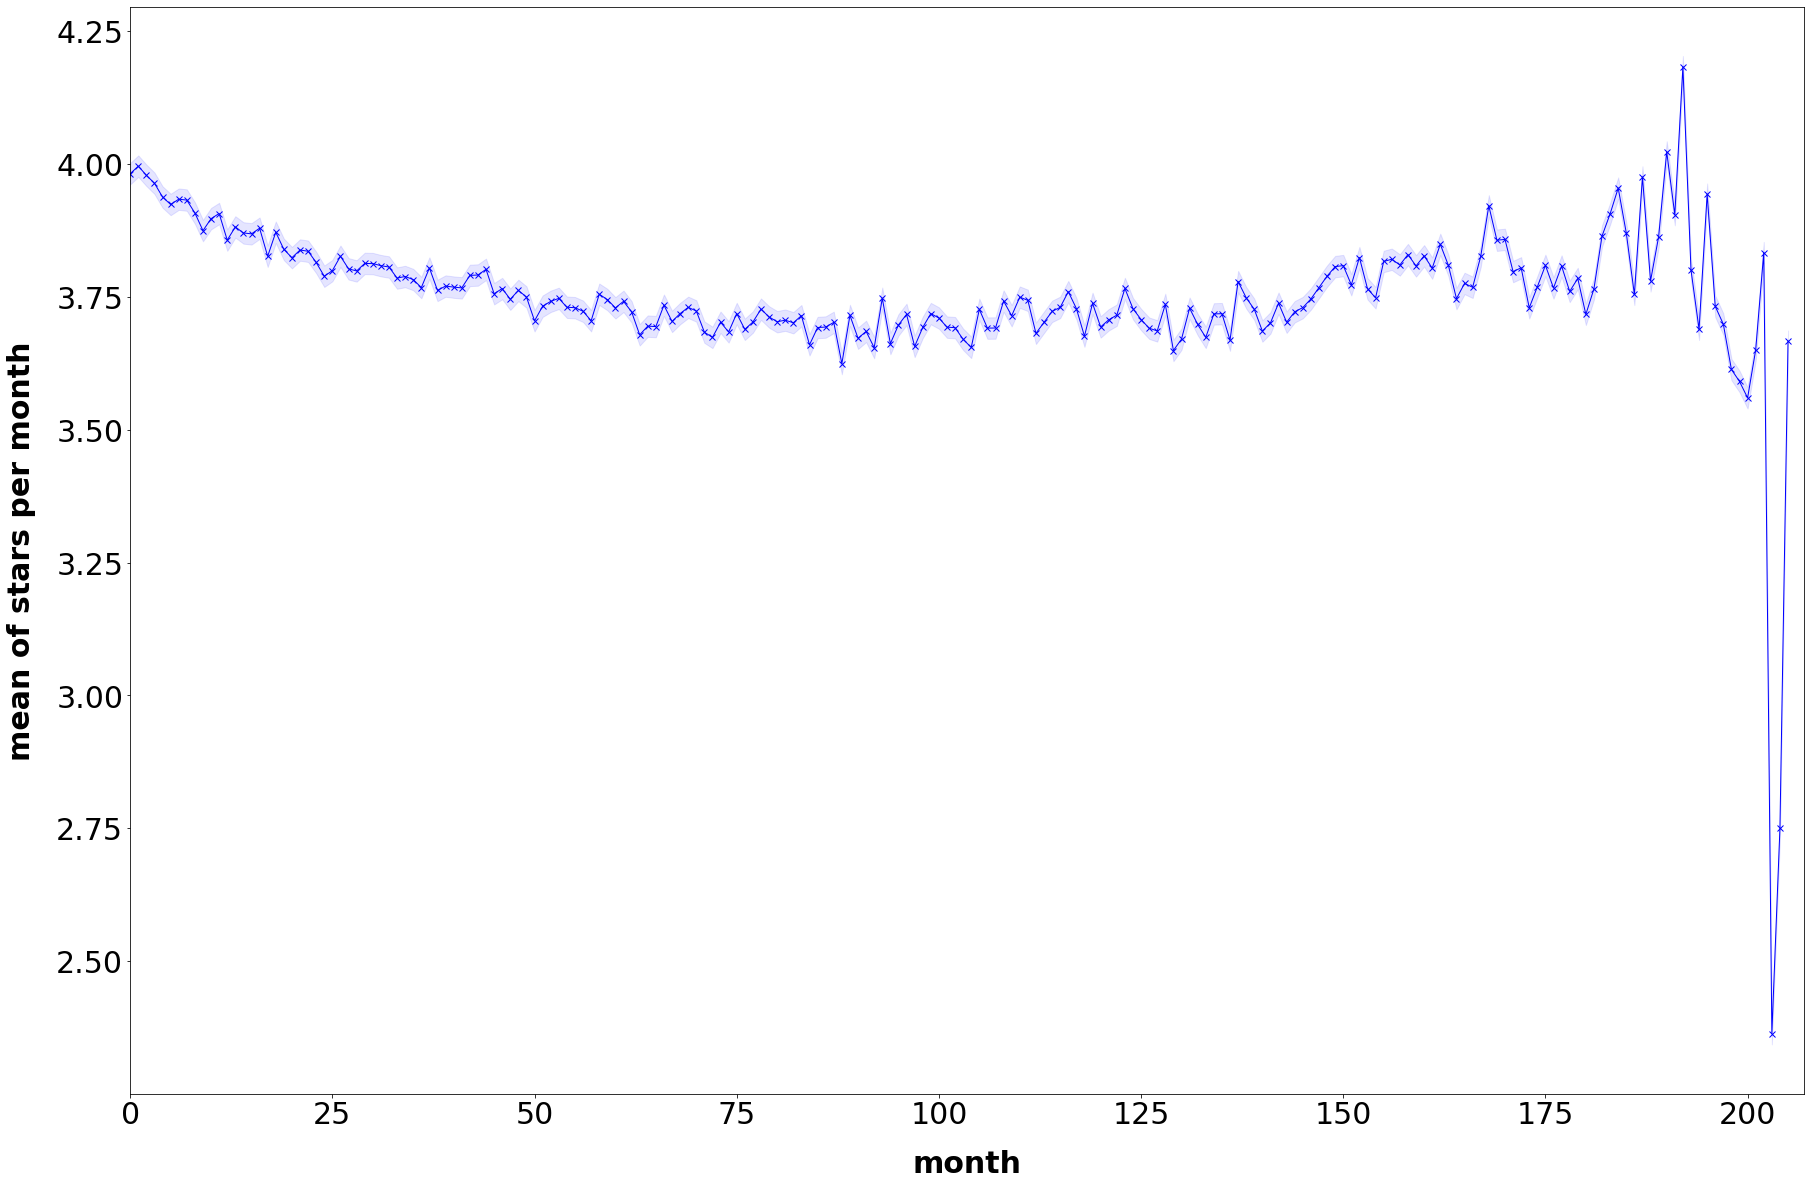

In [55]:
%matplotlib inline 
plt.figure(figsize=(30, 20))
plt.rcParams.update({'font.size': 30})
#starsData.plot(x='month', y = 'mean',color='blue', linewidth=1, marker='x')
x_axis = starsData['month'].values
mean = starsData['mean'].values
plt.plot(x_axis,mean,color='blue', linewidth=1, marker='x')
plt.fill_between(x_axis,(mean-ci),(mean+ci),color='blue', linewidth=1,alpha=.1)
plt.xlim(0,207)
plt.ylabel("mean of stars per month", labelpad=20, weight='bold', size=30)
plt.xlabel("month", labelpad=20, weight='bold', size=30)

plt.show();

<span style="color:black; font-weight:700;font-size:18px"> Κρατάμε τις πρώτες 60 τιμές, τα πρώτα 5 χρόνια, βρίσκουμε το confidence interval από τον τύπο και εκτυπώνουμε το γράφημα μέσο όρο αστεριών ανά μήνα για τα πρώτα 5 χρόνια.</span>

In [56]:
# get the mean of reviews for the first 5 years
meanOfStars5yr = mean[:61]

# ci = 1.95*σ/sqr_root(n), we chose 1.96 cause of 95%
ci = 1.96 * np.std(meanOfStars5yr)/np.sqrt(61)

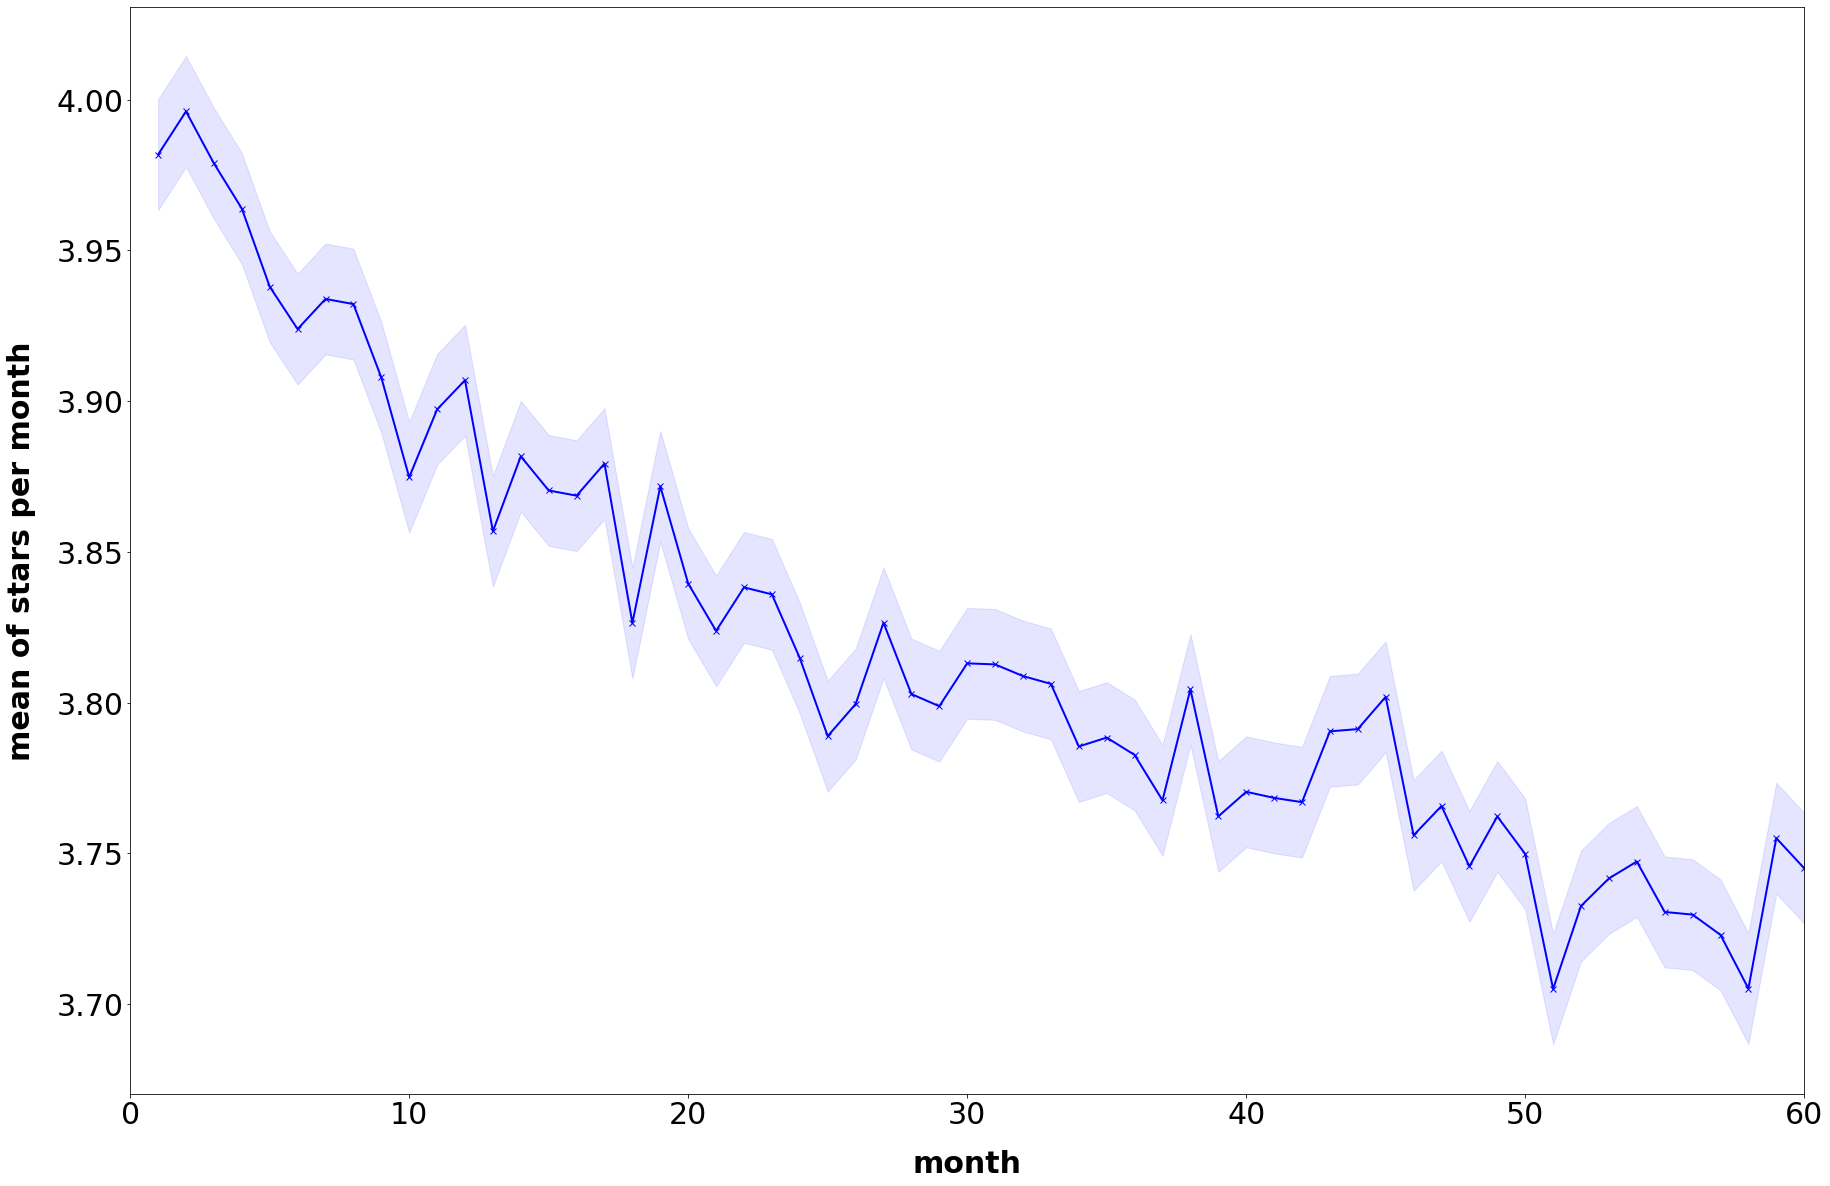

In [57]:
plt.figure(figsize=(30, 20))
plt.rcParams.update({'font.size': 30})
ax = plt.plot(np.arange(1,62),meanOfStars5yr,color='blue', linewidth=2, marker='x')
plt.fill_between(np.arange(1,62),(meanOfStars5yr-ci),(meanOfStars5yr+ci),color='blue', linewidth=1,alpha=.1)
plt.xlim(0,60)
plt.ylabel("mean of stars per month", labelpad=20, weight='bold', size=30)
plt.xlabel("month", labelpad=20, weight='bold', size=30)
plt.show()

# Exercise 3C

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε το αρχείο RedfinPhila.tsv και κρατάμε μόνο τις στήλες region και median_sale_price. </span>

In [58]:
bus = pd.read_csv('businessPhilly.csv', converters={'postal_code' : str})

In [59]:
postalData = pd.read_csv('businessPhillyPostalCode.csv')

In [60]:
realEst = pd.read_csv('RedfinPhila.tsv', sep='\t')

# printing data
realEst.head()
realEstRegion = realEst[['region','median_sale_price']]

print(realEstRegion)

                region  median_sale_price
0      Zip Code: 19070           252438.0
1      Zip Code: 19078           580000.0
2      Zip Code: 19043           219900.0
3      Zip Code: 19124            55125.0
4      Zip Code: 19124            69000.0
...                ...                ...
45239  Zip Code: 19041          1200819.0
45240  Zip Code: 19079            50000.0
45241  Zip Code: 19127           208500.0
45242  Zip Code: 44663            90500.0
45243  Zip Code: 19151           143500.0

[45244 rows x 2 columns]


<span style="color:black; font-weight:700;font-size:18px"> Κάνουμε groupby το dataframe μας σύμφωνα με region και μπαίνοντας μέσα σε κάθε dataframe του κάθε region υπολογίζουμε την μέση τιμή. </span>

In [125]:
region_groups = realEstRegion.groupby('region')

# key is the zip_code and the value is the MEAN of all median_sale_prices
region_dict = {}

for region, region_data in region_groups:
    #print(region)
    #print(region_data.head())
    medianList = region_data['median_sale_price'].values
    med = 0
    for i in range(len(medianList)):
        med += medianList[i]
    region_dict[region[10:]] = med/len(medianList)
    #print("Mean of region:",med/len(medianList))
    #print('=============================')

In [62]:
regions = list(region_dict.keys())

# here the following line WASNT a comment... 
#regions = regions[len(regions)//2:]

meanOfRegions = []
for reg in regions:
    meanOfRegions.append(region_dict[reg])

<span style="color:black; font-weight:700;font-size:18px"> Για κάποιον λόγο το postal_code μέσα στο csv είχε αποθηκευτεί ως float αυτόματα. Ψάχνοτας στο διαδίκτυο είδα ότι έχει ξανασυμβεί σε άτομα και έπρεπε να το λύσω "χειροκίνητα". Δοκίμασα να διαβάσω από κάποια json αρχείο, αλλά μάταια. Χρειάστηκε να γεμίσω τις άδειες τιμές με 0, να μετατρέψω το float σε int για να πάρω το floor της τιμής και τέλος να γίνει str. </span>

In [63]:
# replace column
postalData = postalData.fillna(0)
postalData = postalData.astype(int)
postalData = postalData.astype(str)

bus['postal_code'] = postalData['postal_code']

<span style="color:black; font-weight:700;font-size:18px"> Παίρνουμε την μέση τιμή του κάθε region. </span>

In [64]:
# here we make the list that has the amount of businesses in the region
business_inRegion = []
meanOfStars = []
for i in range(len(regions)):
    # count returns a COLUMN(type: dataframe), not a whole dFrame of all the rows with region==the zip_code
    # along with some info about it. The first info is the count of rows
    # aka how many businesses we have.
    count = bus[bus.postal_code == regions[i]]
    n = len(count.index)
    sumOfStars = count['stars'].sum()
    #print("LENGTH:",n)
    #print("star column\n",count['stars'])
    #print("sum of stars",sumOfStars)
    #print("##############################")
    #print("##############################")
    #print("##############################")
    #here we get a dataframe with all the rows with region==the zip_code and we sum the column of the stars
    #sumOfStars = bus[bus.postal_code == regions[i]].sum()[8]
    #print(sumOfStars,count[0])
    
    # we get some warnings because some regions DONT have businesses, so count = 0
    business_inRegion.append(n)
    meanOfStars.append(sumOfStars/n)

<ipython-input-64-fb943317cd20>:23: RuntimeWarning: invalid value encountered in double_scalars
  meanOfStars.append(sumOfStars/n)


In [65]:
#checking that we have same of amounts of records
print(len(regions),len(meanOfRegions),len(business_inRegion), len(meanOfStars))

106 106 106 106


In [66]:
record = {'region' : regions,
          'meanOfRegions' : meanOfRegions,
          'countOfBusiness' : business_inRegion,
          'meanOfStars' : meanOfStars} 

data = pd.DataFrame(record, columns = ['region', 'meanOfRegions', 'countOfBusiness', 'meanOfStars'])

<span style="color:black; font-weight:700;font-size:18px"> Βλέποντας στο heat-map τα correlation μπορούμε να πούμε ότι υπάρχει κάποια συσχέτιση μεταξύ meanOfRegions-countOfBusiness και meanOfStars-countOfBusiness. Κοιτώντας βέβαια και το pairplot η συσχετίση meanOfRegions-countOfBusiness είναι διακριτή με correlation = 0.32 </span>

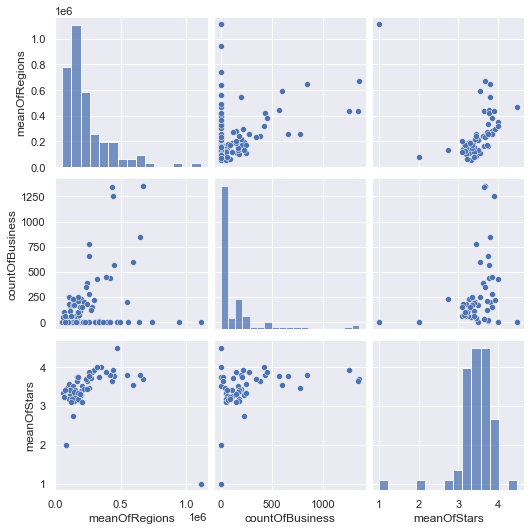

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(data)

<AxesSubplot:>

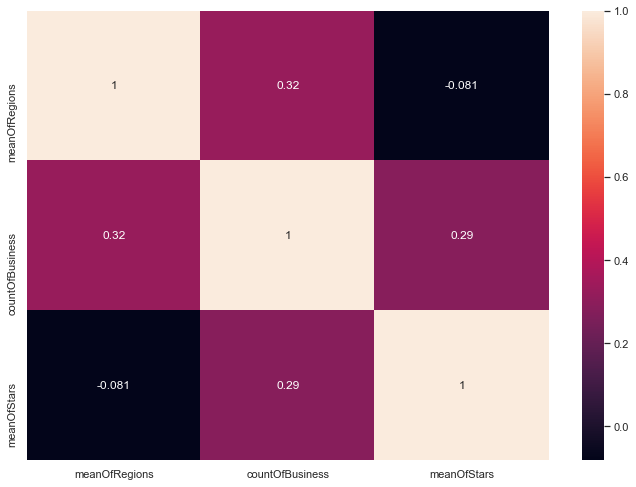

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(), annot=True)

<span style="color:black; font-weight:700;font-size:18px"> Με το t-test βρίσκουμε μικρό p-value. </span>

In [135]:
stats.ttest_ind(data['countOfBusiness'], data['meanOfRegions'], axis=0,equal_var=True)

Ttest_indResult(statistic=-13.658452342577208, pvalue=8.187383300637235e-31)

<span style="color:black; font-weight:700;font-size:18px"> Παίρνουμε μόνο τα σπίτια με πάνω από 200χιλ μέσο όρο και επαναλαμβάνουμε την διαδικασία. </span>

In [49]:
# time for houses over 200k

In [71]:
realEstRegion.head()

,region,median_sale_price
0,Zip Code: 19070,252438.0
1,Zip Code: 19078,580000.0
2,Zip Code: 19043,219900.0
3,Zip Code: 19124,55125.0
4,Zip Code: 19124,69000.0


In [72]:
realEstRegion = realEstRegion[realEstRegion.median_sale_price > 200000]
realEstRegion.head()

,region,median_sale_price
0,Zip Code: 19070,252438.0
1,Zip Code: 19078,580000.0
2,Zip Code: 19043,219900.0
5,Zip Code: 19104,215000.0
7,Zip Code: 19115,250999.5


In [126]:
region_groups_2 = realEstRegion.groupby('region')

# key is the zip_code and the value is the MEAN of all median_sale_prices
region_dict_2 = {}

for region, region_data in region_groups_2:
    #print(region)
    #print(region_data.head())
    medianList = region_data['median_sale_price'].values
    med = 0
    for i in range(len(medianList)):
        med += medianList[i]
    region_dict_2[region[10:]] = med/len(medianList)
    #print("Mean of region:",med/len(medianList))
    #print('=============================')

In [74]:
regions_2 = list(region_dict_2.keys())

# here the following line WASNT a comment... 
#regions = regions[len(regions)//2:]

meanOfRegions_2 = []
for reg in regions_2:
    meanOfRegions_2.append(region_dict_2[reg])

In [75]:
# here we make the list that has the amount of businesses in the region
business_inRegion_2 = []
meanOfStars_2 = []
for i in range(len(regions_2)):
    # count returns a COLUMN(type: dataframe), not a whole dFrame of all the rows with region==the zip_code
    # along with some info about it. The first info is the count of rows
    # aka how many businesses we have.
    count = bus[bus.postal_code == regions_2[i]]
    n = len(count.index)
    sumOfStars = count['stars'].sum()
    #print("LENGTH:",n)
    #print("star column\n",count['stars'])
    #print("sum of stars",sumOfStars)
    #print("##############################")
    #print("##############################")
    #print("##############################")
    #here we get a dataframe with all the rows with region==the zip_code and we sum the column of the stars
    #sumOfStars = bus[bus.postal_code == regions[i]].sum()[8]
    #print(sumOfStars,count[0])
    
    # we get some warnings because some regions DONT have businesses, so count = 0
    business_inRegion_2.append(n)
    meanOfStars_2.append(sumOfStars/n)

<ipython-input-75-645aea386c4a>:23: RuntimeWarning: invalid value encountered in double_scalars
  meanOfStars_2.append(sumOfStars/n)


In [76]:
record_2 = {'region' : regions_2,
          'meanOfRegions' : meanOfRegions_2,
          'countOfBusiness' : business_inRegion_2,
          'meanOfStars' : meanOfStars_2} 

data_2 = pd.DataFrame(record_2, columns = ['region', 'meanOfRegions', 'countOfBusiness', 'meanOfStars'])

<span style="color:black; font-weight:700;font-size:18px"> Τώρα έχουμε μια αντιστροφή στις συσχετίσεις μας. Τώρα, η συσχετίση countOfBusiness-meanOfStars είναι υψηλότερη. Δηλαδή στο υψηλό μέσο όρο αστεριών έχουμε περισσότερες επιχειρήσεις (δες pairplot). </span>

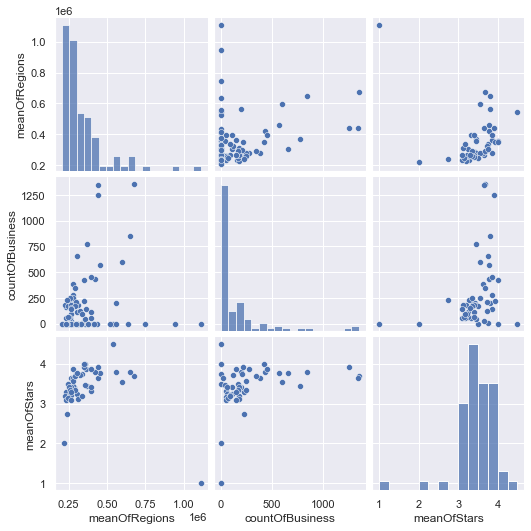

In [77]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(data_2)

<AxesSubplot:>

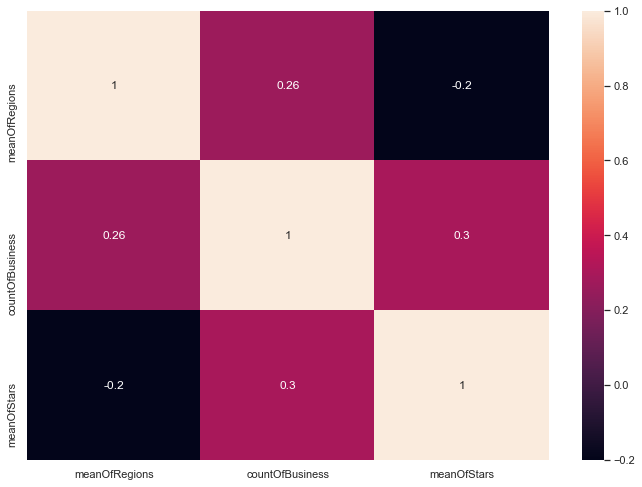

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data_2.corr(), annot=True)

# Exercise 3D 

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε και κρατάμε μόνο τις γραμμές όπου στην στήλη categories περιέχει την λέξη restaurant. </span>

In [84]:
# READING JSON FILE IS BETTER BECAUSE CSV TURNS ALL COLUMNS TO STRINGS
with open('businessPhilly.json', encoding='utf-8') as inputfile:
    bus = pd.read_json(inputfile)

bus = pd.read_json('businessPhilly.json')

# get all businesses that have restaurants in category
rest = bus[bus['categories'].str.contains('Restaurant', na=False)]

In [85]:
rest.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


<span style="color:black; font-weight:700;font-size:18px"> Στο attr κρατάμε από τα παραπάνω εστιατόρια την στήλη attributes και με την χρήση του literal_eval και lambda μετατρέπουμε τα string την στήλης σε λεξικά. </span> 

In [86]:
# get column of attributes
attr = rest['attributes']
print(type(attr.iloc[0]))

attr = attr.apply(lambda x: ast.literal_eval(x) if x is not None else None)
print(type(attr.iloc[0]))

<class 'str'>
<class 'dict'>


<span style="color:black; font-weight:700;font-size:18px"> Έχοντας λοιπόν μια στήλη με λεξικά τραβάμε την τιμή του κλειδιού RestaurantsPriceRange -όπου υπάρχει φυσικά, γίνεται έλεγχος-, και άμα η τιμή είναι μικρότερη του 3 τοποθετούμε το λεξικό μέσα σε μια λίστα attrListCheap αλλιώς το τοποθετούμε στην λίστα attrListExp </span>

In [88]:
# make two lists, one that contains ALL the DICTIONARIES of the rows that 'RestaurantsPriceRange'<3 (cheap ones)
# and a second list that contains ALL the DICTIONARIES of the rows that 'RestaurantsPriceRange'>3 (expensive ones)
attrListTmp = attr.values
attrListCheap = []
attrListExp = []
print(len(attr.values))
for i in range(len(attr.values)):
    
    # get dictionary
    x = attrListTmp[i]
    #print(type(x))
    if(type(x) != dict):
        #print("skipped")
        continue
    
    price = x.get('RestaurantsPriceRange2')
    #print(price)
    if(price == "None" or not price):
        continue
    #if(not price):
    #    print("skipped")
    #    continue
    
    if(int(price) < 3):
        attrListCheap.append(str(x))
    else:
        attrListExp.append(str(x))

5854


<span style="color:black; font-weight:700;font-size:18px"> Τυπώνουμε για εξακρίβωση </span>

In [89]:
print("################CHEAP RESTAURANTS################")
print("Length:",len(attrListCheap),"type:",type(attrListCheap[0]))
print("################EXPENSIVE RESTAURANTS################")
print("Length:",len(attrListExp),"type:",type(attrListExp[0]))

################CHEAP RESTAURANTS################
Length: 4650 type: <class 'str'>
################EXPENSIVE RESTAURANTS################
Length: 289 type: <class 'str'>


<span style="color:black; font-weight:700;font-size:18px"> Τώρα έχουμε δύο λίστες attrListCheap και attrListExp που περιέχονται όλα τα λεξικά από τα cheap και τα expensive restaurants αντίστοιχα. Ανάλογα αν στο dataframe rest(εστιατόρια), στην στήλη attributes περιέχεται το λέξικο σε μία από τις δύο λίστες, μπαίνει στο αντίστοιχο dataframe, cheapRest και expRest </span>

In [139]:
# make dataframe that only contains cheap restaurants
# if the row in the column attributes has a dictionary that is contained in attrListCheap
# then append it
cheapRest = rest[rest['attributes'].isin(attrListCheap)]
#cheapRest.head()

# same thinking here:
# make dataframe that only contains expensive restaurants
expRest = rest[rest['attributes'].isin(attrListExp)]
print("Length of cheap:",len(cheapRest.index))
print("Length of expensive:",len(expRest.index))

Length of cheap: 4650
Length of expensive: 289


<span style="color:black; font-weight:700;font-size:18px"> Εκτυπώνουμε το μέσο όρο, το μήκος και την απόκλιση </span>

In [92]:
print("############### CHEAP RESTAURANTS ###############")
print("Mean Stars:",cheapRest['stars'].mean(),"length:",len(cheapRest.index),"std:",cheapRest['stars'].std())
print("############### EXPENSIVE RESTAURANTS ###############")
print("Mean Stars:",expRest['stars'].mean(),"length:",len(expRest.index),"std:",expRest['stars'].std())

############### CHEAP RESTAURANTS ###############
Mean Stars: 3.5029032258064516 length: 4650 std: 0.783200520817005
############### EXPENSIVE RESTAURANTS ###############
Mean Stars: 3.726643598615917 length: 289 std: 0.6545907444166118


<span style="color:black; font-weight:700;font-size:18px"> Τώρα χρησιμοποιώντας τον τύπο ci = 1.95*σ/sqr_root(n) υπολογίζουμε το έμπιστο διάστημα για καθένα από τα δύο -cheap, expensive- άνω και κάτω της μέσης τιμής και ύστερα κάνουμε το γράφημα. Οι βούλες είναι οι μέσες τιμές και οι κόκκινες μπάρες το έμπιστο διάστημα </span>

In [93]:
# Calculate confidence interval
# ci = 1.95*σ/sqr_root(n), we chose 1.96 cause of 95%
cheapCI = 1.96 * cheapRest['stars'].std()/np.sqrt(len(cheapRest.index))
expCI = 1.96 * expRest['stars'].std()/np.sqrt(len(expRest.index))
print("cheap ci:", cheapCI, "and expensive ci:",expCI)

cheap ci: 0.022511402984762882 and expensive ci: 0.07547046229744465


In [94]:
# make error list y_error = [minErrorList, maxErrorList]
y_error = [[cheapCI, expCI],[cheapCI, expCI]]

In [95]:
# make a new dataframe to plot
restData = {'PriceRange': ['cheap', 'expensive'],
           'MeanStars': [cheapRest['stars'].mean(), expRest['stars'].mean()]}
df = pd.DataFrame(restData)
df.head()

,PriceRange,MeanStars
0,cheap,3.502903
1,expensive,3.726644


<ErrorbarContainer object of 3 artists>

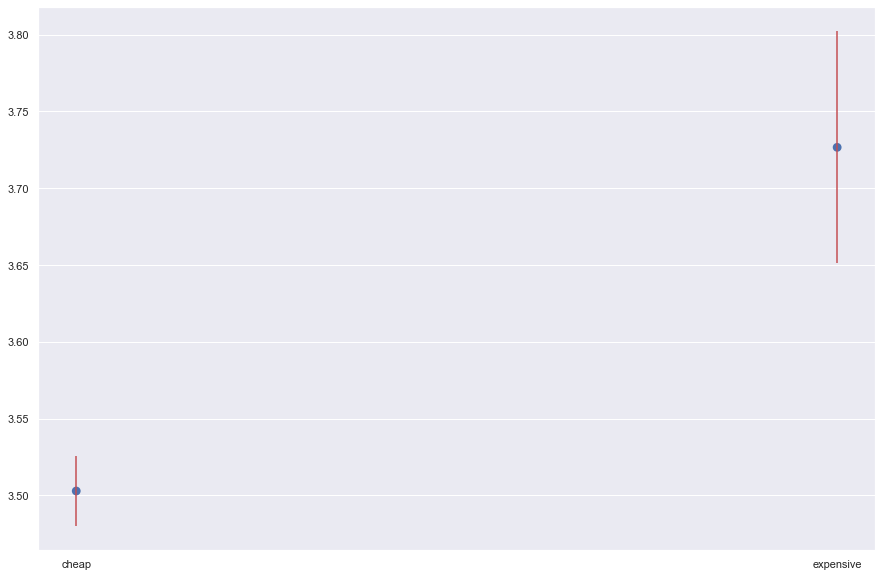

In [96]:
plt.figure(figsize=(15, 10))
sns.pointplot(x = 'PriceRange', y = 'MeanStars', data=restData, join=False, ci=None)
plt.errorbar(x=[0, 1],y=restData['MeanStars'],
            yerr=y_error, fmt='none', c= 'r')

<span style="color:black; font-weight:700;font-size:18px"> Κάνουμε το t-test και βρίσκουμε χαμηλό pvalue=2.0487190675109893e-06, οπότε υπάρχει σχέση. </span>

In [97]:
stats.ttest_ind(a=cheapRest['stars'], b=expRest['stars'], equal_var=True)

Ttest_indResult(statistic=-4.754226620279354, pvalue=2.0487190675109893e-06)

<span style="color:black; font-weight:700;font-size:18px"> Επαναλαμβάνουμε την ίδια διαδικασία, δημιουργούμε δυο λίστες που περιέχουν τα λεξικά των casual και των formal εστιατορίων, και κοιτώντας στο dataframe rest, δημιουργούμε άλλα δύο dataframes casualRest, formalRest ανάλογα με πού ανήκει το λεξικό του εστιατορίου. </span>

In [98]:
# make two lists, one that contains ALL the DICTIONARIES of the rows that 'RestaurantsAttire' has casual
# and a second list that contains ALL the DICTIONARIES of the rows that 'RestaurantsAttire' has either
# dressy or formal
attrListTmp = attr.values
attrListCasual = []
attrListFormal = []
print(len(attr.values))
for i in range(len(attr.values)):
    
    # get dictionary
    x = attrListTmp[i]

    if(type(x) != dict):
        continue
    
    clothes = x.get('RestaurantsAttire')
    
    if(clothes == "None" or not clothes):
        continue

    
    #print(clothes,"'casual'",type(clothes))
    #print(clothes == "casual")
    #print("%%%%%%%%%%%%%%%%%%%%5")
    if((clothes == "'casual'") or (clothes == "u'casual'")):
        attrListCasual.append(x)
    elif((clothes == "'dressy'") or (clothes == "u'dressy'") or (clothes == "'formal'") or (clothes == "u'formal'")):
        attrListFormal.append(x)

5854


In [100]:
# make dataframe that only contains casual restaurants
# if the row in the column attributes has a dictionary that is contained in attrListCasual
# then append it
casualRest = rest[attr.isin(attrListCasual)]
#cheapRest.head()

# same thinking here:
# make dataframe that only contains expensive restaurants
formalRest = rest[attr.isin(attrListFormal)]
print(len(casualRest.index))
casualRest.head()

4230


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
15,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
82,82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104.0,39.954573,-75.194894,3.0,56,1,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


<span style="color:black; font-weight:700;font-size:18px"> Τώρα χρησιμοποιώντας τον τύπο ci = 1.95*σ/sqr_root(n) υπολογίζουμε το έμπιστο διάστημα για καθένα από τα δύο -casual, formal- άνω και κάτω της μέσης τιμής και ύστερα κάνουμε το γράφημα. Οι βούλες είναι οι μέσες τιμές και οι κόκκινες μπάρες το έμπιστο διάστημα </span>

In [101]:
print("############### CASUAL RESTAURANTS ###############")
print("Mean Stars:",casualRest['stars'].mean(),"length:",len(casualRest.index),"std:",casualRest['stars'].std())
print("############### FORMAL RESTAURANTS ###############")
print("Mean Stars:",formalRest['stars'].mean(),"length:",len(formalRest.index),"std:",formalRest['stars'].std())

############### CASUAL RESTAURANTS ###############
Mean Stars: 3.511465721040189 length: 4230 std: 0.7506116230052353
############### FORMAL RESTAURANTS ###############
Mean Stars: 3.5867768595041323 length: 121 std: 0.6508894105709415


In [102]:
# Calculate confidence interval
# ci = 1.95*σ/sqr_root(n), we chose 1.96 cause of 95%
casualCI = 1.96 * casualRest['stars'].std()/np.sqrt(len(casualRest.index))
formalCI = 1.96 * formalRest['stars'].std()/np.sqrt(len(formalRest.index))
print("casual ci:", casualCI, "and formal ci:",formalCI)

casual ci: 0.02262044647949703 and formal ci: 0.1159766586108223


In [103]:
# make error list y_error = [minErrorList, maxErrorList]
y_error = [[casualCI, formalCI],[casualCI, formalCI]]

In [104]:
# make a new dataframe to plot
restData = {'RestaurantsAttire': ['casual', 'formal'],
           'MeanStars': [casualRest['stars'].mean(), formalRest['stars'].mean()]}
df = pd.DataFrame(restData)
df.head()

,RestaurantsAttire,MeanStars
0,casual,3.511466
1,formal,3.586777


<ErrorbarContainer object of 3 artists>

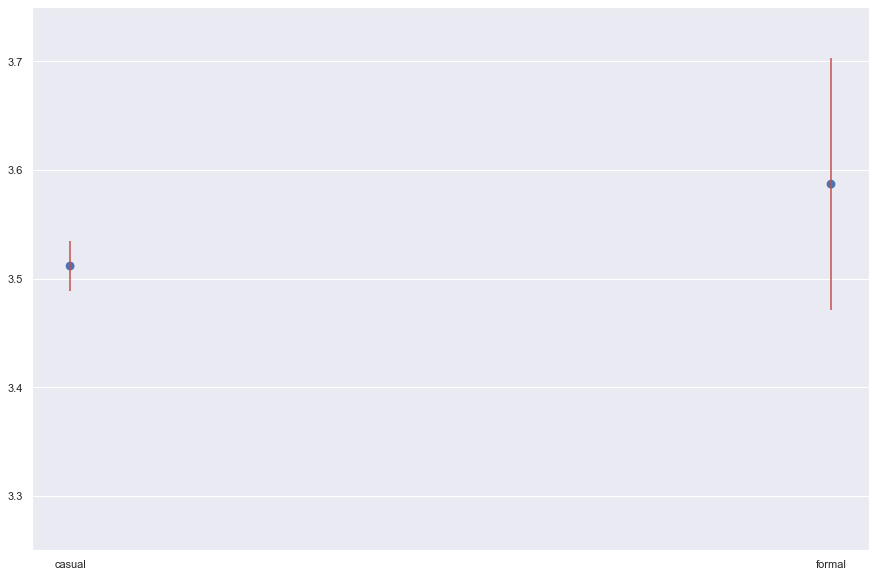

In [105]:
plt.figure(figsize=(15, 10))
plt.ylim(3.25,3.75)
sns.pointplot(x = 'RestaurantsAttire', y = 'MeanStars', data=restData, join=False, ci=None)
plt.errorbar(x=[0, 1],y=restData['MeanStars'],
            yerr=y_error, fmt='none', c= 'r')

<span style="color:black; font-weight:700;font-size:18px"> Κάνουμε το t-test και βρίσκουμε pvalue=0.2749145788569803, άρα δεν υπάρχει σχέση. </span>

In [106]:
stats.ttest_ind(a=casualRest['stars'], b=formalRest['stars'], equal_var=True)

Ttest_indResult(statistic=-1.0919522454523218, pvalue=0.2749145788569803)

# Exercise 3E

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε τις επιχειρήσεις και τις βάζουμε σε ένα dataframe </span>

In [140]:
# READING JSON FILE IS BETTER BECAUSE CSV TURNS ALL COLUMNS TO STRINGS
with open('businessPhilly.json', encoding='utf-8') as inputfile:
    bus = pd.read_json(inputfile)

bus.head()


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


<span style="color:black; font-weight:700;font-size:18px"> Από τα εστιατόρια, παίρνουμε όσα στην στήλη categories περιέχουν την λέξη restaurant, μετά παίρνουμε την στήλη attributes που περιέχει "λεξικά" σε μορφή str, που τα μετατρέπουμε σε λεξικά με την χρήση lambda και ast.literal_eval. </span>

In [141]:
# get all businesses that have restaurants in category
rest = bus[bus['categories'].str.contains('Restaurant', na=False)]

# get column of attributes
attr = rest['attributes']
print(type(attr.iloc[0]))

attr = attr.apply(lambda x: ast.literal_eval(x) if x is not None else None)
print(type(attr.iloc[0]))

<class 'str'>
<class 'dict'>


<span style="color:black; font-weight:700;font-size:18px"> Διατρέχοντας το dataframe attr, δημιουργούμε δύο λεξικά με κλειδιά romantic και classy και περιέχουν το καθένα από αυτά τιμές True/False ανάλογα με το αν στο attr, το εκάστοτε λεξικό-εστιατόριο, στο λεξικό Ambience (λεξικό εντός του λεξικού!), στα κλειδιά romantic(ή intimate) και classy(ή upscale) έχουν True/False τιμές. </span>

In [142]:
# make two lists, one that contains ALL the DICTIONARIES of the rows that 'RestaurantsPriceRange'<3 (cheap ones)
# and a second list that contains ALL the DICTIONARIES of the rows that 'RestaurantsPriceRange'>3 (expensive ones)
attrListTmp = attr.values

#contigency = dict.fromkeys(['romantic','classy'])
contigency = {"romantic":[],"classy":[]};
print(contigency)
print(len(attr.values))
for i in range(len(attr.values)):
    
    # get dictionary
    x = attrListTmp[i]

    if(type(x) != dict):
        continue

    
    ambience = x.get('Ambience')
    if(ambience == "None" or not ambience):
        continue
        
    # get ambience dict
    ambience = ast.literal_eval(ambience)
    
    #if(not price):
    #    print("skipped")
    #    continue
    
    if(ambience['romantic'] == True or ambience['intimate'] == True):
        #print(ambience['upscale'])
        try:
            if(ambience.get('classy',None) == True or ambience.get('upscale',None) == True):
                contigency["romantic"].append(True)
                contigency["classy"].append(True)
            else:
                contigency["romantic"].append(True)
                contigency["classy"].append(False)
        except KeyError:
            continue
    else:
        if(ambience.get('classy',None) == True or ambience.get('upscale',None) == True):
            contigency["romantic"].append(False)
            contigency["classy"].append(True)
        else:
            contigency["romantic"].append(False)
            contigency["classy"].append(False)

{'romantic': [], 'classy': []}
5854


<span style="color:black; font-weight:700;font-size:18px"> Το μετατρέπουμε σε dataframe </span>

In [143]:
con = pd.DataFrame.from_dict(contigency,orient='index').transpose()
con.head()

,romantic,classy
0,False,True
1,False,False
2,False,False
3,False,False
4,False,True


<span style="color:black; font-weight:700;font-size:18px"> Βρίσκουμε τον obsverved πίνακα και μετά το χ^2 test, p-value, degree of freedom και τέλος τον πίνακα των expected τιμών. </span>

In [144]:
cdf = pd.crosstab(con['romantic'],con['classy'])
print(cdf)

classy    False  True 
romantic              
False      3543    712
True        113    105


In [145]:
res = stats.chi2_contingency(cdf)
print("chi_square test statistic:",res[0])
print("p-value:",res[1])
print("Degrees of freedom:",res[2])
print("Expected values:",res[3])

chi_square test statistic: 135.13847533646765
p-value: 3.079265795785991e-31
Degrees of freedom: 1
Expected values: [[3477.81801923  777.18198077]
 [ 178.18198077   39.81801923]]


<span style="color:black; font-weight:700;font-size:18px"> Με το p-value μικρότερο του 0.05 έχουμε συσχέτιση μεταξύ romantic και classy. </span>

In [146]:
a = 0.05
if(res[1]<a):
    print("There is dependency between our variables with p-value:",res[1])
else:
    print("We don't have sufficient evidence to say there is dependency")

There is dependency between our variables with p-value: 3.079265795785991e-31


<span style="color:black; font-weight:700;font-size:18px"> Βλέπουμε ανάμεσα στους πίνακες observed και expected υπάρχει μεγάλη ομοιότητα. </span>